Install & Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast  # For parsing string lists
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


Load the Real Netflix Data

In [3]:
# Load datasets
print("📂 Loading Netflix datasets...")

titles = pd.read_csv('titles.csv')
credits = pd.read_csv('credits.csv')

print(f"✅ Titles loaded: {len(titles):,} records")
print(f"✅ Credits loaded: {len(credits):,} records")

print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\n📊 Titles Dataset Shape: {titles.shape}")
print(f"📊 Credits Dataset Shape: {credits.shape}")

print("\n📋 Titles Columns:")
print(titles.columns.tolist())

print("\n👁️ First 5 titles:")
titles.head()

📂 Loading Netflix datasets...
✅ Titles loaded: 5,850 records
✅ Credits loaded: 77,801 records

DATASET OVERVIEW

📊 Titles Dataset Shape: (5850, 15)
📊 Credits Dataset Shape: (77801, 5)

📋 Titles Columns:
['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

👁️ First 5 titles:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


Data Cleaning & Preparation

In [4]:
print("="*80)
print("DATA CLEANING & PREPARATION")
print("="*80)

# Check missing values
print("\n📊 Missing Values in Titles:")
missing = titles.isnull().sum()
missing_pct = (missing / len(titles) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage (%)': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

# Parse genres (they're stored as string lists)
def parse_list_column(val):
    """Parse string representation of lists"""
    try:
        if pd.isna(val):
            return []
        # Remove brackets and quotes, split by comma
        val = str(val).strip("[]").replace("'", "").replace('"', '')
        return [x.strip() for x in val.split(',') if x.strip()]
    except:
        return []

titles['genres_list'] = titles['genres'].apply(parse_list_column)
titles['countries_list'] = titles['production_countries'].apply(parse_list_column)

print("\n✅ Data cleaning complete!")
print(f"\n📊 Total unique titles: {titles['title'].nunique():,}")
print(f"📊 Total cast & crew: {credits['name'].nunique():,}")

DATA CLEANING & PREPARATION

📊 Missing Values in Titles:
                   Missing Count  Percentage (%)
seasons                     3744           64.00
age_certification           2619           44.77
imdb_votes                   498            8.51
imdb_score                   482            8.24
imdb_id                      403            6.89
tmdb_score                   311            5.32
tmdb_popularity               91            1.56
description                   18            0.31
title                          1            0.02

✅ Data cleaning complete!

📊 Total unique titles: 5,798
📊 Total cast & crew: 54,314


Content Type Analysis

CONTENT TYPE ANALYSIS

📺 Content Distribution:
   MOVIE: 3,744 (64.0%)
   SHOW: 2,106 (36.0%)


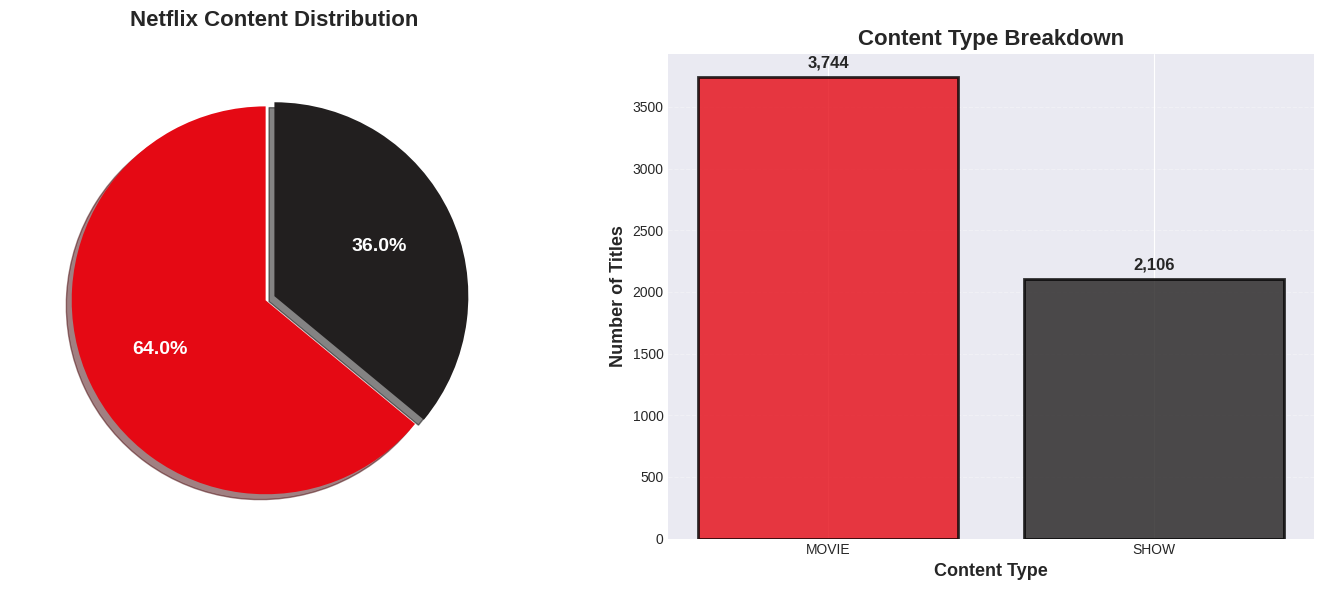


✅ Visualization 1 complete!


In [5]:
print("="*80)
print("CONTENT TYPE ANALYSIS")
print("="*80)

type_counts = titles['type'].value_counts()
type_pct = (type_counts / len(titles) * 100).round(2)

print("\n📺 Content Distribution:")
for content_type, count in type_counts.items():
    print(f"   {content_type}: {count:,} ({type_pct[content_type]}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
colors = ['#E50914', '#221F1F']  # Netflix colors
explode = (0.05, 0)
axes[0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, explode=explode,
            textprops={'fontsize': 14, 'weight': 'bold', 'color': 'white'},
            shadow=True)
axes[0].set_title('Netflix Content Distribution', fontsize=16, weight='bold', pad=20)

# Bar chart with values
bars = axes[1].bar(type_counts.index, type_counts.values,
                    color=colors, edgecolor='black', linewidth=2, alpha=0.8)
axes[1].set_title('Content Type Breakdown', fontsize=16, weight='bold')
axes[1].set_ylabel('Number of Titles', fontsize=13, weight='bold')
axes[1].set_xlabel('Content Type', fontsize=13, weight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, type_counts.values)):
    axes[1].text(i, value + 50, f'{value:,}',
                 ha='center', va='bottom', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualization 1 complete!")

 Genre Analysis

GENRE ANALYSIS

🎭 Total unique genres: 19
🎭 Total genre tags: 15,088

🏆 Top 15 Genres:
    1. drama               : 2,968 titles (50.7%)
    2. comedy              : 2,325 titles (39.7%)
    3. thriller            : 1,228 titles (21.0%)
    4. action              : 1,157 titles (19.8%)
    5. romance             :  971 titles (16.6%)
    6. documentation       :  952 titles (16.3%)
    7. crime               :  936 titles (16.0%)
    8. animation           :  705 titles (12.1%)
    9. family              :  682 titles (11.7%)
   10. fantasy             :  630 titles (10.8%)
   11. scifi               :  589 titles (10.1%)
   12. european            :  443 titles (7.6%)
   13. horror              :  378 titles (6.5%)
   14. music               :  262 titles (4.5%)
   15. history             :  254 titles (4.3%)


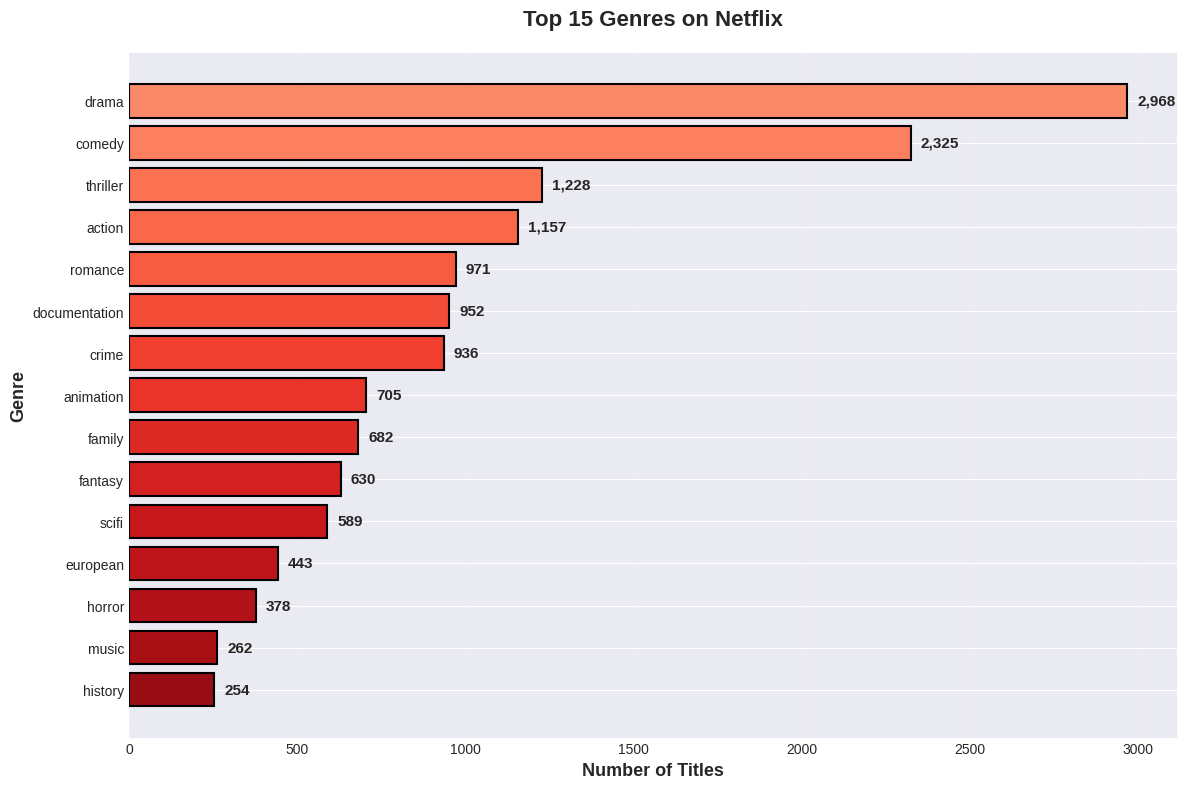


✅ Visualization 2 complete!


In [6]:
print("="*80)
print("GENRE ANALYSIS")
print("="*80)

# Extract all genres
all_genres = []
for genres_list in titles['genres_list']:
    all_genres.extend(genres_list)

genre_counts = pd.Series(all_genres).value_counts().head(15)

print(f"\n🎭 Total unique genres: {len(pd.Series(all_genres).unique())}")
print(f"🎭 Total genre tags: {len(all_genres):,}")
print("\n🏆 Top 15 Genres:")
for i, (genre, count) in enumerate(genre_counts.items(), 1):
    pct = (count / len(titles) * 100)
    print(f"   {i:2d}. {genre:20s}: {count:4,} titles ({pct:.1f}%)")

# Visualization
plt.figure(figsize=(12, 8))
colors_palette = plt.cm.Reds(np.linspace(0.4, 0.9, len(genre_counts)))

bars = plt.barh(genre_counts.index, genre_counts.values,
                color=colors_palette, edgecolor='black', linewidth=1.5)

plt.xlabel('Number of Titles', fontsize=13, weight='bold')
plt.ylabel('Genre', fontsize=13, weight='bold')
plt.title('Top 15 Genres on Netflix', fontsize=16, weight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels
for i, (bar, value) in enumerate(zip(bars, genre_counts.values)):
    plt.text(value + 30, i, f'{value:,}',
             va='center', fontsize=11, weight='bold')

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\n✅ Visualization 2 complete!")

Release Year Trends

RELEASE YEAR TRENDS

📅 Year Range: 1945 - 2022
📅 Median Year: 2018
📅 Mean Year: 2016.4

📊 Content by Decade:
   1940s:    1 titles (  0.0%)
   1950s:    5 titles (  0.1%)
   1960s:    8 titles (  0.1%)
   1970s:   18 titles (  0.3%)
   1980s:   52 titles (  0.9%)
   1990s:  121 titles (  2.1%)
   2000s:  369 titles (  6.3%)
   2010s: 3,304 titles ( 56.5%)
   2020s: 1,972 titles ( 33.7%)


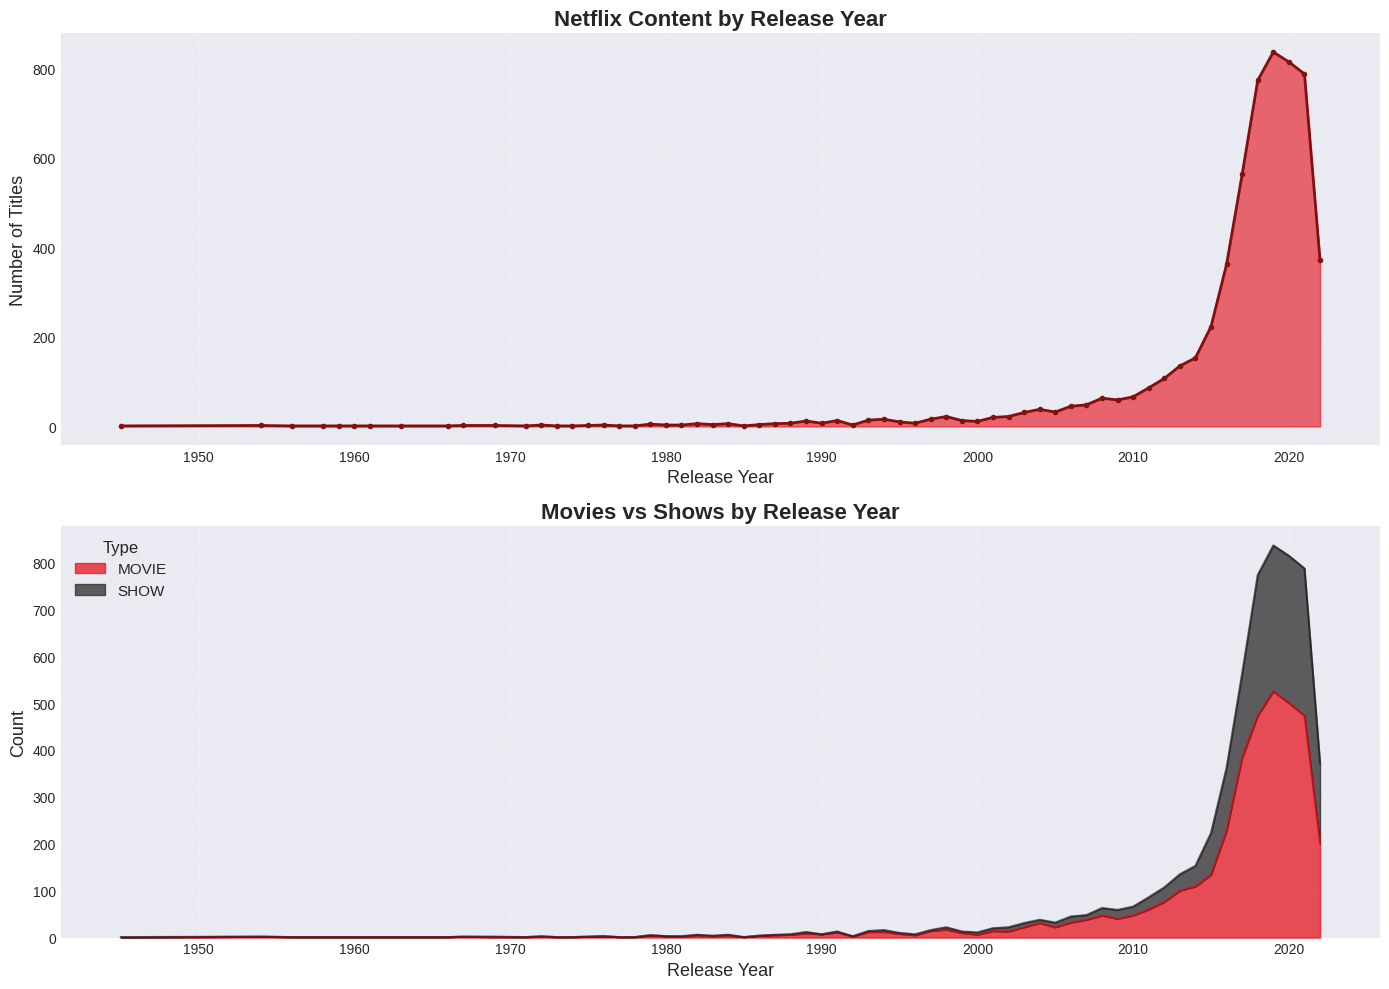


✅ Visualization 3 complete!


In [7]:
print("="*80)
print("RELEASE YEAR TRENDS")
print("="*80)

# Year statistics
print(f"\n📅 Year Range: {titles['release_year'].min()} - {titles['release_year'].max()}")
print(f"📅 Median Year: {titles['release_year'].median():.0f}")
print(f"📅 Mean Year: {titles['release_year'].mean():.1f}")

# Decade analysis
titles['decade'] = (titles['release_year'] // 10) * 10
decade_counts = titles['decade'].value_counts().sort_index()

print("\n📊 Content by Decade:")
for decade, count in decade_counts.items():
    pct = (count / len(titles) * 100)
    print(f"   {int(decade)}s: {count:4,} titles ({pct:5.1f}%)")

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Yearly distribution
yearly_counts = titles['release_year'].value_counts().sort_index()
axes[0].fill_between(yearly_counts.index, yearly_counts.values,
                      alpha=0.6, color='#E50914')
axes[0].plot(yearly_counts.index, yearly_counts.values,
             color='#831010', linewidth=2, marker='o', markersize=3)
axes[0].set_title('Netflix Content by Release Year', fontsize=16, weight='bold')
axes[0].set_xlabel('Release Year', fontsize=13)
axes[0].set_ylabel('Number of Titles', fontsize=13)
axes[0].grid(True, alpha=0.3, linestyle='--')

# Movies vs Shows over time
yearly_type = titles.groupby(['release_year', 'type']).size().unstack(fill_value=0)
yearly_type.plot(kind='area', stacked=True, ax=axes[1],
                 color=['#E50914', '#221F1F'], alpha=0.7)
axes[1].set_title('Movies vs Shows by Release Year', fontsize=16, weight='bold')
axes[1].set_xlabel('Release Year', fontsize=13)
axes[1].set_ylabel('Count', fontsize=13)
axes[1].legend(title='Type', fontsize=11, title_fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("\n✅ Visualization 3 complete!")

Geographic Analysis

GEOGRAPHIC DISTRIBUTION

🌍 Total unique countries: 109
🌍 Total country tags: 6,528

🏆 Top 15 Production Countries:
    1. US   : 2,323 titles (39.7%)
    2. IN   :  622 titles (10.6%)
    3. GB   :  404 titles (6.9%)
    4. JP   :  287 titles (4.9%)
    5. FR   :  248 titles (4.2%)
    6. KR   :  228 titles (3.9%)
    7. CA   :  219 titles (3.7%)
    8. ES   :  211 titles (3.6%)
    9. DE   :  139 titles (2.4%)
   10. MX   :  126 titles (2.2%)
   11. BR   :  102 titles (1.7%)
   12. CN   :  102 titles (1.7%)
   13. PH   :   86 titles (1.5%)
   14. TR   :   84 titles (1.4%)
   15. AU   :   84 titles (1.4%)


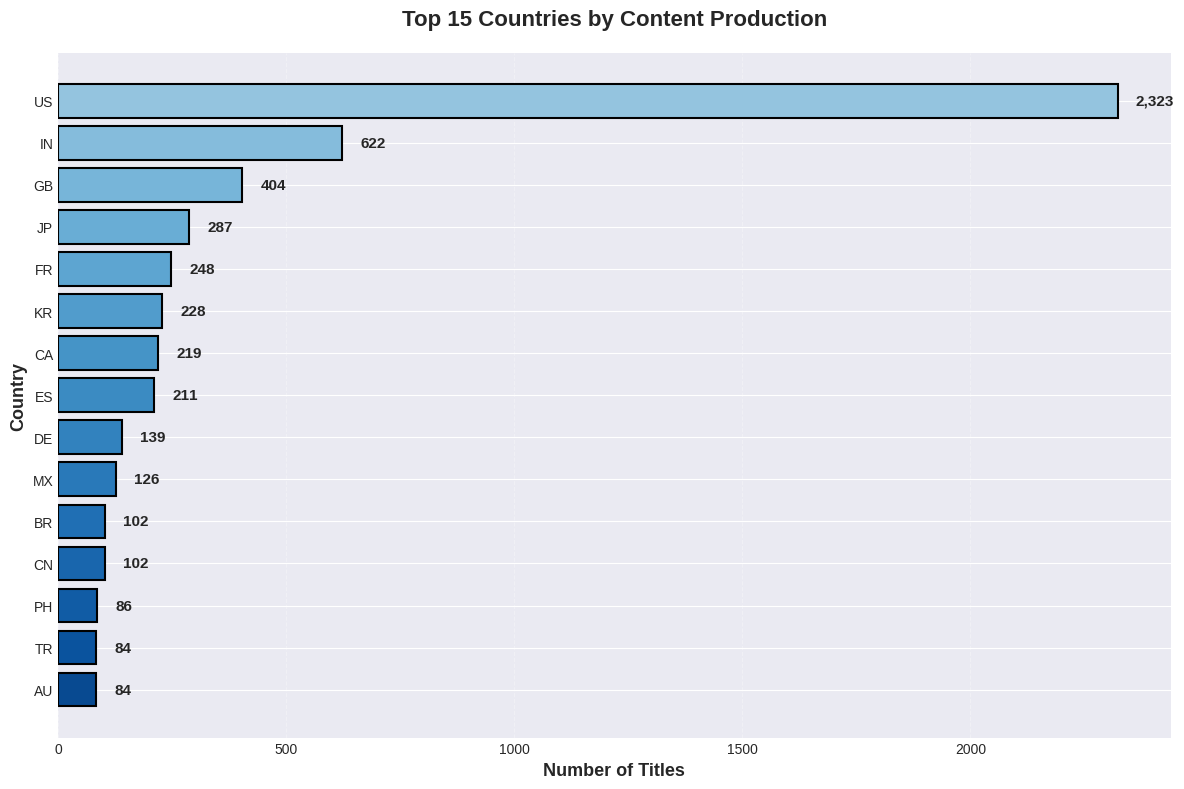


✅ Visualization 4 complete!


In [8]:
print("="*80)
print("GEOGRAPHIC DISTRIBUTION")
print("="*80)

# Extract all countries
all_countries = []
for countries_list in titles['countries_list']:
    all_countries.extend(countries_list)

country_counts = pd.Series(all_countries).value_counts().head(15)

print(f"\n🌍 Total unique countries: {len(pd.Series(all_countries).unique())}")
print(f"🌍 Total country tags: {len(all_countries):,}")
print("\n🏆 Top 15 Production Countries:")
for i, (country, count) in enumerate(country_counts.items(), 1):
    pct = (count / len(titles) * 100)
    print(f"   {i:2d}. {country:5s}: {count:4,} titles ({pct:.1f}%)")

# Visualization
plt.figure(figsize=(12, 8))
colors_palette = plt.cm.Blues(np.linspace(0.4, 0.9, len(country_counts)))

bars = plt.barh(country_counts.index, country_counts.values,
                color=colors_palette, edgecolor='black', linewidth=1.5)

plt.xlabel('Number of Titles', fontsize=13, weight='bold')
plt.ylabel('Country', fontsize=13, weight='bold')
plt.title('Top 15 Countries by Content Production', fontsize=16, weight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels
for i, (bar, value) in enumerate(zip(bars, country_counts.values)):
    plt.text(value + 40, i, f'{value:,}',
             va='center', fontsize=11, weight='bold')

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\n✅ Visualization 4 complete!")

IMDB Ratings Analysis

IMDB RATINGS ANALYSIS

⭐ Titles with IMDB scores: 5,368 (91.8%)

📊 IMDB Score Statistics:
   Mean Score: 6.51
   Median Score: 6.60
   Std Dev: 1.16
   Min Score: 1.5
   Max Score: 9.6

🏆 Top 10 Highest Rated Titles:
    1. #ABtalks                                      (2018) - 9.6 ⭐
    2. Breaking Bad                                  (2008) - 9.5 ⭐
    3. Khawatir                                      (2005) - 9.5 ⭐
    4. Avatar: The Last Airbender                    (2005) - 9.3 ⭐
    5. Our Planet                                    (2019) - 9.3 ⭐
    6. Reply 1988                                    (2015) - 9.2 ⭐
    7. Chhota Bheem & Krishna vs Zimbara             (2013) - 9.1 ⭐
    8. My Mister                                     (2018) - 9.1 ⭐
    9. The Last Dance                                (2020) - 9.1 ⭐
   10. Kota Factory                                  (2019) - 9.1 ⭐


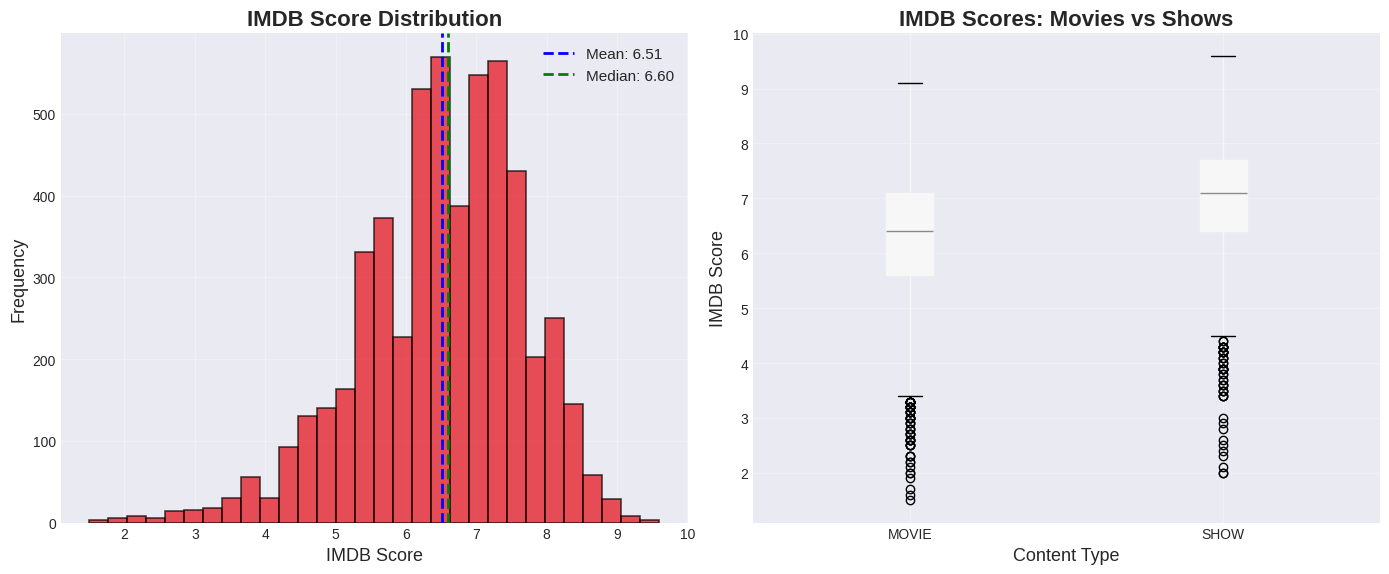


✅ Visualization 5 complete!


In [9]:
print("="*80)
print("IMDB RATINGS ANALYSIS")
print("="*80)

# Filter titles with IMDB scores
titles_with_scores = titles[titles['imdb_score'].notna()].copy()

print(f"\n⭐ Titles with IMDB scores: {len(titles_with_scores):,} ({len(titles_with_scores)/len(titles)*100:.1f}%)")
print(f"\n📊 IMDB Score Statistics:")
print(f"   Mean Score: {titles_with_scores['imdb_score'].mean():.2f}")
print(f"   Median Score: {titles_with_scores['imdb_score'].median():.2f}")
print(f"   Std Dev: {titles_with_scores['imdb_score'].std():.2f}")
print(f"   Min Score: {titles_with_scores['imdb_score'].min():.1f}")
print(f"   Max Score: {titles_with_scores['imdb_score'].max():.1f}")

# Top rated content
print("\n🏆 Top 10 Highest Rated Titles:")
top_rated = titles_with_scores.nlargest(10, 'imdb_score')[['title', 'type', 'release_year', 'imdb_score']]
for i, row in enumerate(top_rated.itertuples(), 1):
    print(f"   {i:2d}. {row.title[:45]:45s} ({row.release_year}) - {row.imdb_score:.1f} ⭐")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution histogram
axes[0].hist(titles_with_scores['imdb_score'], bins=30,
             color='#E50914', edgecolor='black', linewidth=1.2, alpha=0.7)
axes[0].axvline(titles_with_scores['imdb_score'].mean(),
                color='blue', linestyle='--', linewidth=2,
                label=f'Mean: {titles_with_scores["imdb_score"].mean():.2f}')
axes[0].axvline(titles_with_scores['imdb_score'].median(),
                color='green', linestyle='--', linewidth=2,
                label=f'Median: {titles_with_scores["imdb_score"].median():.2f}')
axes[0].set_title('IMDB Score Distribution', fontsize=16, weight='bold')
axes[0].set_xlabel('IMDB Score', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Box plot by type
titles_with_scores.boxplot(column='imdb_score', by='type', ax=axes[1],
                             patch_artist=True)
axes[1].set_title('IMDB Scores: Movies vs Shows', fontsize=16, weight='bold')
axes[1].set_xlabel('Content Type', fontsize=13)
axes[1].set_ylabel('IMDB Score', fontsize=13)
axes[1].get_figure().suptitle('')  # Remove auto title
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualization 5 complete!")

 Top Actors & Directors Analysis

In [10]:
print("="*80)
print("TOP ACTORS & DIRECTORS ANALYSIS")
print("="*80)

# Separate actors and directors
actors = credits[credits['role'] == 'ACTOR'].copy()
directors = credits[credits['role'] == 'DIRECTOR'].copy()

print(f"\n👥 Total cast records: {len(actors):,}")
print(f"🎬 Total director records: {len(directors):,}")
print(f"\n👥 Unique actors: {actors['name'].nunique():,}")
print(f"🎬 Unique directors: {directors['name'].nunique():,}")

# Top 20 Actors (by number of titles)
print("\n" + "="*80)
print("🏆 TOP 20 ACTORS (Most Titles)")
print("="*80)
top_actors = actors['name'].value_counts().head(20)
for i, (actor, count) in enumerate(top_actors.items(), 1):
    print(f"   {i:2d}. {actor:40s}: {count:3d} titles")

# Top 20 Directors (by number of titles)
print("\n" + "="*80)
print("🏆 TOP 20 DIRECTORS (Most Titles)")
print("="*80)
top_directors = directors['name'].value_counts().head(20)
for i, (director, count) in enumerate(top_directors.items(), 1):
    print(f"   {i:2d}. {director:40s}: {count:3d} titles")

print("\n✅ Actor & Director analysis complete!")

TOP ACTORS & DIRECTORS ANALYSIS

👥 Total cast records: 73,251
🎬 Total director records: 4,550

👥 Unique actors: 51,308
🎬 Unique directors: 3,444

🏆 TOP 20 ACTORS (Most Titles)
    1. Boman Irani                             :  25 titles
    2. Kareena Kapoor Khan                     :  25 titles
    3. Shah Rukh Khan                          :  23 titles
    4. Takahiro Sakurai                        :  21 titles
    5. Paresh Rawal                            :  20 titles
    6. Priyanka Chopra Jonas                   :  20 titles
    7. Amitabh Bachchan                        :  20 titles
    8. Anupam Kher                             :  19 titles
    9. Yuki Kaji                               :  19 titles
   10. Nawazuddin Siddiqui                     :  19 titles
   11. Junichi Suwabe                          :  19 titles
   12. Fred Tatasciore                         :  18 titles
   13. Om Puri                                 :  18 titles
   14. Aamir Khan                           

Visualize Top Talent

TOP TALENT VISUALIZATIONS


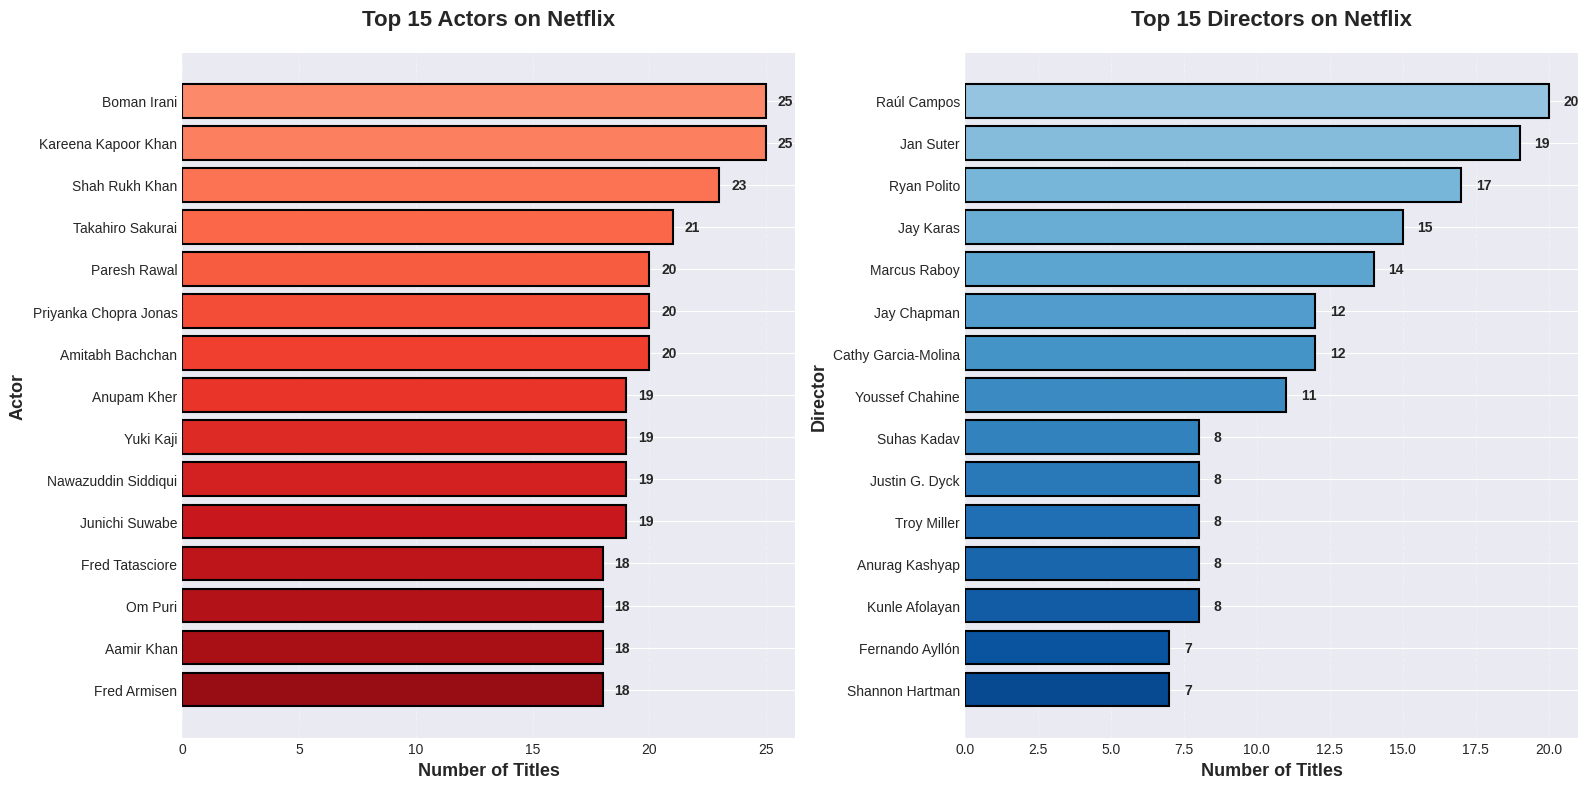


✅ Visualization 6 complete!


In [11]:
print("="*80)
print("TOP TALENT VISUALIZATIONS")
print("="*80)

# Get top 15 for visualization
top_actors_15 = actors['name'].value_counts().head(15)
top_directors_15 = directors['name'].value_counts().head(15)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top Actors
colors_actors = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_actors_15)))
bars1 = axes[0].barh(top_actors_15.index, top_actors_15.values,
                      color=colors_actors, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Number of Titles', fontsize=13, weight='bold')
axes[0].set_ylabel('Actor', fontsize=13, weight='bold')
axes[0].set_title('Top 15 Actors on Netflix', fontsize=16, weight='bold', pad=20)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (bar, value) in enumerate(zip(bars1, top_actors_15.values)):
    axes[0].text(value + 0.5, i, str(value),
                 va='center', fontsize=10, weight='bold')

# Top Directors
colors_directors = plt.cm.Blues(np.linspace(0.4, 0.9, len(top_directors_15)))
bars2 = axes[1].barh(top_directors_15.index, top_directors_15.values,
                      color=colors_directors, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Number of Titles', fontsize=13, weight='bold')
axes[1].set_ylabel('Director', fontsize=13, weight='bold')
axes[1].set_title('Top 15 Directors on Netflix', fontsize=16, weight='bold', pad=20)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (bar, value) in enumerate(zip(bars2, top_directors_15.values)):
    axes[1].text(value + 0.5, i, str(value),
                 va='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualization 6 complete!")

 Detailed Actor/Director Insights

In [12]:
print("="*80)
print("DETAILED TALENT INSIGHTS")
print("="*80)

# Get specific actor/director details
def get_person_titles(person_name, role_type='ACTOR'):
    """Get all titles for a specific person"""
    person_credits = credits[(credits['name'] == person_name) &
                            (credits['role'] == role_type)]

    # Merge with titles to get full info
    person_titles = person_credits.merge(titles, left_on='id', right_on='id')
    return person_titles

# Example: Analyze top actor
top_actor_name = top_actors.index[0]
actor_titles = get_person_titles(top_actor_name, 'ACTOR')

print(f"\n🎭 Analysis of: {top_actor_name}")
print(f"   Total titles: {len(actor_titles)}")
print(f"   Movies: {len(actor_titles[actor_titles['type'] == 'MOVIE'])}")
print(f"   Shows: {len(actor_titles[actor_titles['type'] == 'SHOW'])}")
if len(actor_titles[actor_titles['imdb_score'].notna()]) > 0:
    print(f"   Average IMDB score: {actor_titles['imdb_score'].mean():.2f}")
print(f"   Year range: {actor_titles['release_year'].min():.0f} - {actor_titles['release_year'].max():.0f}")

# Example: Analyze top director
top_director_name = top_directors.index[0]
director_titles = get_person_titles(top_director_name, 'DIRECTOR')

print(f"\n🎬 Analysis of: {top_director_name}")
print(f"   Total titles: {len(director_titles)}")
print(f"   Movies: {len(director_titles[director_titles['type'] == 'MOVIE'])}")
print(f"   Shows: {len(director_titles[director_titles['type'] == 'SHOW'])}")
if len(director_titles[director_titles['imdb_score'].notna()]) > 0:
    print(f"   Average IMDB score: {director_titles['imdb_score'].mean():.2f}")
print(f"   Year range: {director_titles['release_year'].min():.0f} - {director_titles['release_year'].max():.0f}")

# Most prolific actors by content type
print("\n" + "="*80)
print("MOST PROLIFIC ACTORS BY CONTENT TYPE")
print("="*80)

actors_with_type = actors.merge(titles[['id', 'type']], on='id')

print("\n🎬 Top 10 Movie Actors:")
movie_actors = actors_with_type[actors_with_type['type'] == 'MOVIE']['name'].value_counts().head(10)
for i, (actor, count) in enumerate(movie_actors.items(), 1):
    print(f"   {i:2d}. {actor:40s}: {count:3d} movies")

print("\n📺 Top 10 TV Show Actors:")
show_actors = actors_with_type[actors_with_type['type'] == 'SHOW']['name'].value_counts().head(10)
for i, (actor, count) in enumerate(show_actors.items(), 1):
    print(f"   {i:2d}. {actor:40s}: {count:3d} shows")

print("\n✅ Detailed talent insights complete!")

DETAILED TALENT INSIGHTS

🎭 Analysis of: Boman Irani
   Total titles: 25
   Movies: 25
   Shows: 0
   Average IMDB score: 6.44
   Year range: 2004 - 2021

🎬 Analysis of: Raúl Campos
   Total titles: 20
   Movies: 20
   Shows: 0
   Average IMDB score: 6.09
   Year range: 2016 - 2021

MOST PROLIFIC ACTORS BY CONTENT TYPE

🎬 Top 10 Movie Actors:
    1. Kareena Kapoor Khan                     :  25 movies
    2. Boman Irani                             :  25 movies
    3. Shah Rukh Khan                          :  23 movies
    4. Amitabh Bachchan                        :  20 movies
    5. Paresh Rawal                            :  20 movies
    6. Priyanka Chopra Jonas                   :  19 movies
    7. Ajay Devgn                              :  18 movies
    8. Om Puri                                 :  18 movies
    9. Nassar                                  :  18 movies
   10. Anupam Kher                             :  18 movies

📺 Top 10 TV Show Actors:
    1. Junichi Suwabe        

Runtime Analysis

RUNTIME ANALYSIS

🎬 MOVIE RUNTIME STATISTICS:
   Mean: 98.2 minutes
   Median: 98.0 minutes
   Std Dev: 30.6 minutes
   Min: 2 minutes
   Max: 240 minutes

📺 TV SHOW STATISTICS:
   Mean seasons: 2.2
   Median seasons: 1.0
   Min seasons: 1
   Max seasons: 42


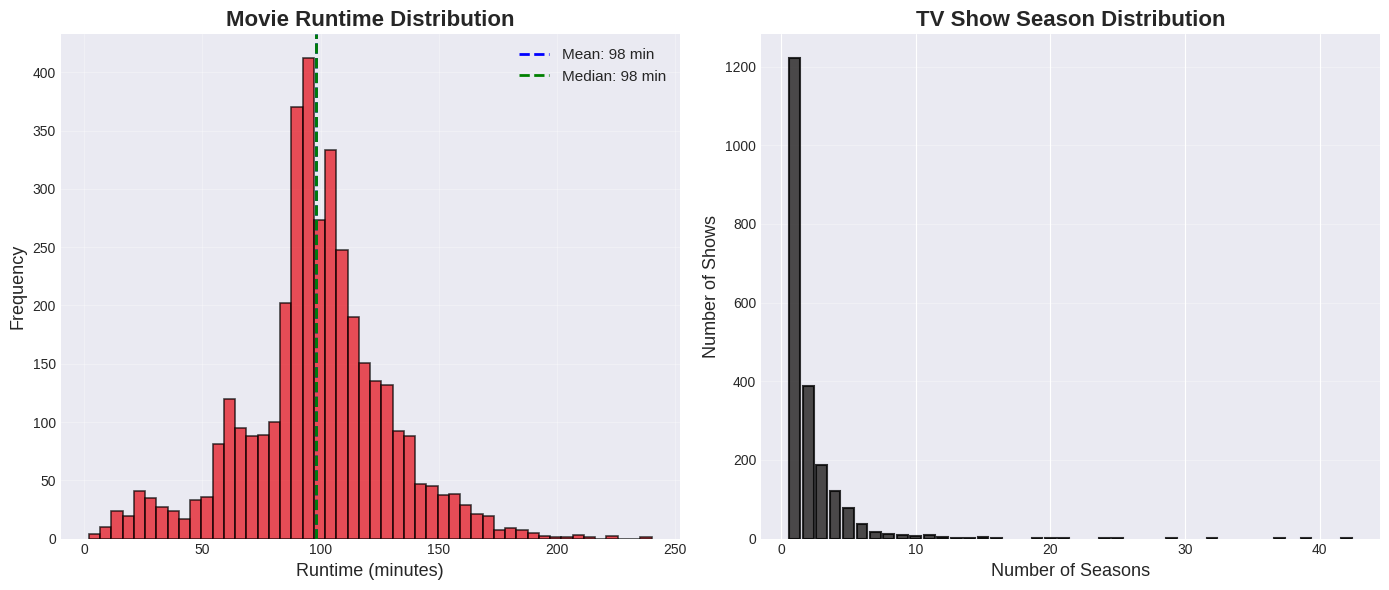


✅ Visualization 7 complete!


In [13]:
print("="*80)
print("RUNTIME ANALYSIS")
print("="*80)

# Separate movies and shows
movies = titles[titles['type'] == 'MOVIE'].copy()
shows = titles[titles['type'] == 'SHOW'].copy()

print("\n🎬 MOVIE RUNTIME STATISTICS:")
print(f"   Mean: {movies['runtime'].mean():.1f} minutes")
print(f"   Median: {movies['runtime'].median():.1f} minutes")
print(f"   Std Dev: {movies['runtime'].std():.1f} minutes")
print(f"   Min: {movies['runtime'].min():.0f} minutes")
print(f"   Max: {movies['runtime'].max():.0f} minutes")

print("\n📺 TV SHOW STATISTICS:")
shows_with_seasons = shows[shows['seasons'].notna()]
print(f"   Mean seasons: {shows_with_seasons['seasons'].mean():.1f}")
print(f"   Median seasons: {shows_with_seasons['seasons'].median():.1f}")
print(f"   Min seasons: {shows_with_seasons['seasons'].min():.0f}")
print(f"   Max seasons: {shows_with_seasons['seasons'].max():.0f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Movie runtime distribution
axes[0].hist(movies['runtime'], bins=50, color='#E50914',
             edgecolor='black', linewidth=1.2, alpha=0.7)
axes[0].axvline(movies['runtime'].mean(), color='blue',
                linestyle='--', linewidth=2,
                label=f'Mean: {movies["runtime"].mean():.0f} min')
axes[0].axvline(movies['runtime'].median(), color='green',
                linestyle='--', linewidth=2,
                label=f'Median: {movies["runtime"].median():.0f} min')
axes[0].set_title('Movie Runtime Distribution', fontsize=16, weight='bold')
axes[0].set_xlabel('Runtime (minutes)', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# TV show seasons distribution
season_counts = shows_with_seasons['seasons'].value_counts().sort_index()
axes[1].bar(season_counts.index, season_counts.values,
            color='#221F1F', edgecolor='black', linewidth=1.5, alpha=0.8)
axes[1].set_title('TV Show Season Distribution', fontsize=16, weight='bold')
axes[1].set_xlabel('Number of Seasons', fontsize=13)
axes[1].set_ylabel('Number of Shows', fontsize=13)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Visualization 7 complete!")

Age Certification Analysis

AGE CERTIFICATION ANALYSIS

📊 Titles with age certification: 3,231 (55.2%)

🔞 Top 15 Age Certifications:
    1. TV-MA     :  883 titles ( 27.3%)
    2. R         :  556 titles ( 17.2%)
    3. TV-14     :  474 titles ( 14.7%)
    4. PG-13     :  451 titles ( 14.0%)
    5. PG        :  233 titles (  7.2%)
    6. TV-PG     :  188 titles (  5.8%)
    7. G         :  124 titles (  3.8%)
    8. TV-Y7     :  120 titles (  3.7%)
    9. TV-Y      :  107 titles (  3.3%)
   10. TV-G      :   79 titles (  2.4%)
   11. NC-17     :   16 titles (  0.5%)

📊 Certification Distribution by Content Type:
type               MOVIE  SHOW
age_certification             
G                    124     0
NC-17                 16     0
PG                   233     0
PG-13                451     0
R                    556     0
TV-14                  0   474
TV-G                   0    79
TV-MA                  0   883
TV-PG                  0   188
TV-Y                   0   107


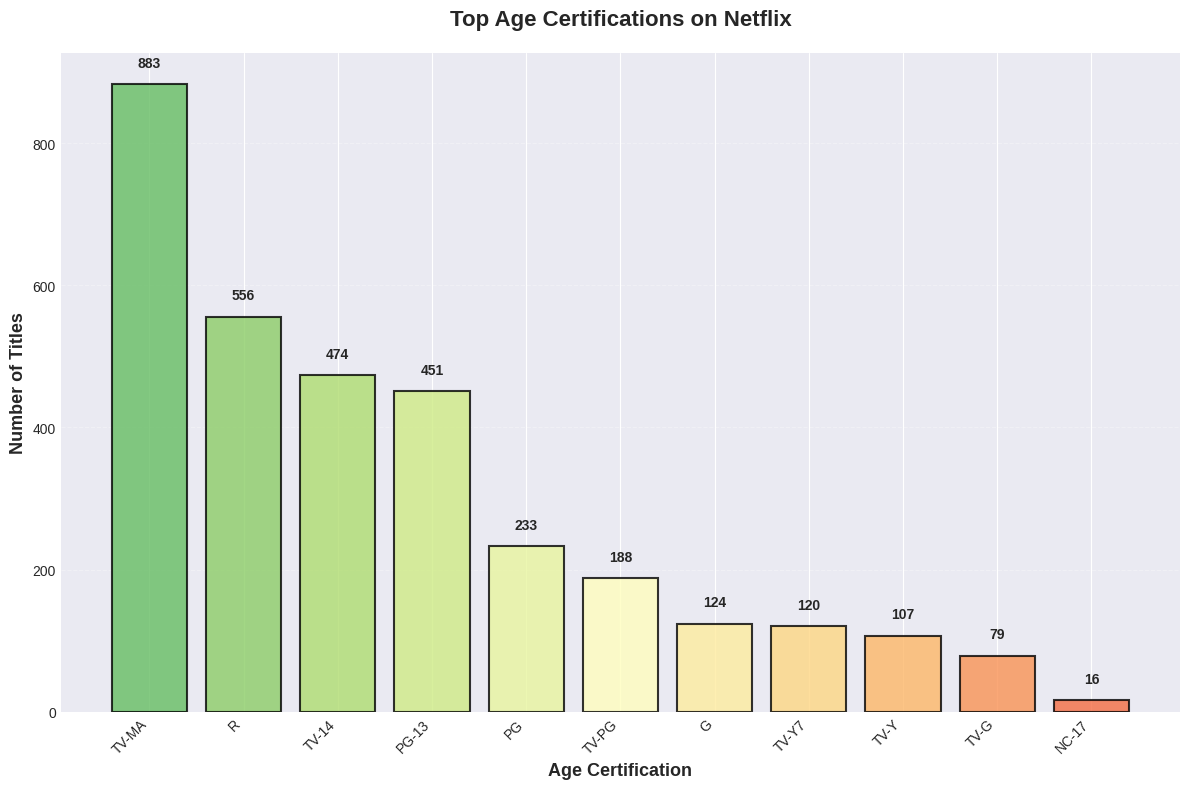


✅ Visualization 8 complete!


In [14]:
print("="*80)
print("AGE CERTIFICATION ANALYSIS")
print("="*80)

# Get titles with age certification
titles_with_cert = titles[titles['age_certification'].notna()].copy()

print(f"\n📊 Titles with age certification: {len(titles_with_cert):,} ({len(titles_with_cert)/len(titles)*100:.1f}%)")

# Top certifications
cert_counts = titles_with_cert['age_certification'].value_counts().head(15)

print("\n🔞 Top 15 Age Certifications:")
for i, (cert, count) in enumerate(cert_counts.items(), 1):
    pct = (count / len(titles_with_cert) * 100)
    print(f"   {i:2d}. {cert:10s}: {count:4,} titles ({pct:5.1f}%)")

# Certification by type
print("\n📊 Certification Distribution by Content Type:")
cert_by_type = pd.crosstab(titles_with_cert['age_certification'],
                            titles_with_cert['type'])
print(cert_by_type.head(10))

# Visualization
plt.figure(figsize=(12, 8))

# Get top 12 for better visibility
top_certs = cert_counts.head(12)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_certs)))

bars = plt.bar(range(len(top_certs)), top_certs.values,
               color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

plt.xticks(range(len(top_certs)), top_certs.index, rotation=45, ha='right')
plt.xlabel('Age Certification', fontsize=13, weight='bold')
plt.ylabel('Number of Titles', fontsize=13, weight='bold')
plt.title('Top Age Certifications on Netflix', fontsize=16, weight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_certs.values)):
    plt.text(i, value + 20, f'{value:,}',
             ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualization 8 complete!")

Actor-Director Collaborations

In [15]:
print("="*80)
print("ACTOR-DIRECTOR COLLABORATION ANALYSIS")
print("="*80)

# Find frequent collaborations
def find_collaborations(min_projects=3):
    """Find actor-director pairs who worked together multiple times"""

    # Get actor-title mapping
    actor_titles = actors[['name', 'id']].rename(columns={'name': 'actor'})

    # Get director-title mapping
    director_titles = directors[['name', 'id']].rename(columns={'name': 'director'})

    # Merge to find collaborations
    collaborations = actor_titles.merge(director_titles, on='id')

    # Count collaborations
    collab_counts = collaborations.groupby(['actor', 'director']).size().reset_index(name='count')

    # Filter by minimum projects
    frequent_collabs = collab_counts[collab_counts['count'] >= min_projects].sort_values('count', ascending=False)

    return frequent_collabs

# Find top collaborations
top_collabs = find_collaborations(min_projects=3)

if len(top_collabs) > 0:
    print(f"\n🤝 Found {len(top_collabs)} actor-director pairs with 3+ collaborations")
    print("\n🏆 Top 15 Actor-Director Collaborations:")
    for i, row in enumerate(top_collabs.head(15).itertuples(), 1):
        print(f"   {i:2d}. {row.actor:30s} & {row.director:30s}: {row.count} projects")
else:
    print("\n📊 No frequent collaborations found in this dataset")

print("\n✅ Collaboration analysis complete!")

ACTOR-DIRECTOR COLLABORATION ANALYSIS

🤝 Found 327 actor-director pairs with 3+ collaborations

🏆 Top 15 Actor-Director Collaborations:
    1. Joross Gamboa                  & Cathy Garcia-Molina           : 7 projects
    2. Takahiro Sakurai               & Hiroyuki Seshita              : 5 projects
    3. Takayuki Suzuki                & Shigeaki Kubo                 : 5 projects
    4. Yuki Yamada                    & Shigeaki Kubo                 : 5 projects
    5. Wataru Ichinose                & Shigeaki Kubo                 : 5 projects
    6. Nada Abou Farhat               & Philippe Aractingi            : 5 projects
    7. Kanta Sato                     & Shigeaki Kubo                 : 5 projects
    8. Johnny Knoxville               & Jeff Tremaine                 : 5 projects
    9. Mamoru Miyano                  & Hiroyuki Seshita              : 5 projects
   10. Robb Wells                     & Mike Clattenburg              : 5 projects
   11. Nawazuddin Siddiqui        

Advanced Insights & Correlations

In [16]:
print("="*80)
print("ADVANCED INSIGHTS & CORRELATIONS")
print("="*80)

# 1. IMDB Score vs Runtime correlation
movies_with_scores = movies[movies['imdb_score'].notna()].copy()
correlation = movies_with_scores['runtime'].corr(movies_with_scores['imdb_score'])
print(f"\n📊 IMDB Score vs Runtime Correlation: {correlation:.3f}")

# 2. Genre popularity over decades
print("\n" + "="*80)
print("GENRE TRENDS BY DECADE")
print("="*80)

# Get recent titles (2000+)
recent_titles = titles[titles['release_year'] >= 2000].copy()
recent_genres = []
for genres_list in recent_titles['genres_list']:
    recent_genres.extend(genres_list)

recent_genre_counts = pd.Series(recent_genres).value_counts().head(10)
print("\n🔥 Top Genres (2000-present):")
for i, (genre, count) in enumerate(recent_genre_counts.items(), 1):
    print(f"   {i:2d}. {genre}: {count:,}")

# 3. Content type by decade
print("\n" + "="*80)
print("CONTENT TYPE EVOLUTION")
print("="*80)

decade_type = titles.groupby(['decade', 'type']).size().unstack(fill_value=0)
decade_pct = decade_type.div(decade_type.sum(axis=1), axis=0) * 100

print("\nMovie vs Show % by Decade:")
print(decade_pct.round(1))

# 4. Top countries by IMDB score
print("\n" + "="*80)
print("HIGHEST-RATED COUNTRIES (by avg IMDB score)")
print("="*80)

# Expand countries and calculate average scores
country_scores = []
for _, row in titles[titles['imdb_score'].notna()].iterrows():
    for country in row['countries_list']:
        country_scores.append({
            'country': country,
            'score': row['imdb_score']
        })

country_scores_df = pd.DataFrame(country_scores)
avg_scores_by_country = country_scores_df.groupby('country')['score'].agg(['mean', 'count'])
avg_scores_by_country = avg_scores_by_country[avg_scores_by_country['count'] >= 10].sort_values('mean', ascending=False)

print("\nTop 10 Countries (min 10 titles):")
for i, (country, row) in enumerate(avg_scores_by_country.head(10).iterrows(), 1):
    print(f"   {i:2d}. {country:5s}: {row['mean']:.2f} avg score ({int(row['count'])} titles)")

print("\n✅ Advanced analysis complete!")

ADVANCED INSIGHTS & CORRELATIONS

📊 IMDB Score vs Runtime Correlation: 0.114

GENRE TRENDS BY DECADE

🔥 Top Genres (2000-present):
    1. drama: 2,842
    2. comedy: 2,244
    3. thriller: 1,189
    4. action: 1,089
    5. documentation: 930
    6. romance: 922
    7. crime: 894
    8. animation: 688
    9. family: 653
   10. fantasy: 612

CONTENT TYPE EVOLUTION

Movie vs Show % by Decade:
type    MOVIE   SHOW
decade              
1940      0.0  100.0
1950    100.0    0.0
1960     87.5   12.5
1970     94.4    5.6
1980     82.7   17.3
1990     81.0   19.0
2000     71.8   28.2
2010     64.6   35.4
2020     59.5   40.5

HIGHEST-RATED COUNTRIES (by avg IMDB score)

Top 10 Countries (min 10 titles):
    1. KR   : 7.23 avg score (197 titles)
    2. IL   : 7.06 avg score (18 titles)
    3. JP   : 6.97 avg score (259 titles)
    4. IE   : 6.88 avg score (15 titles)
    5. PS   : 6.87 avg score (15 titles)
    6. DK   : 6.85 avg score (28 titles)
    7. GB   : 6.80 avg score (378 titles)
    8.

Executive Summary

In [17]:
print("\n")
print("="*80)
print("                    NETFLIX CONTENT EXPLORER")
print("                      EXECUTIVE SUMMARY")
print("="*80)

# Overall stats
print(f"\n📊 DATASET OVERVIEW")
print(f"   Total Titles: {len(titles):,}")
print(f"   Movies: {len(titles[titles['type'] == 'MOVIE']):,} ({len(titles[titles['type'] == 'MOVIE'])/len(titles)*100:.1f}%)")
print(f"   Shows: {len(titles[titles['type'] == 'SHOW']):,} ({len(titles[titles['type'] == 'SHOW'])/len(titles)*100:.1f}%)")
print(f"   Unique Actors: {actors['name'].nunique():,}")
print(f"   Unique Directors: {directors['name'].nunique():,}")

# Year stats
print(f"\n📅 TEMPORAL COVERAGE")
print(f"   Year Range: {titles['release_year'].min()} - {titles['release_year'].max()}")
print(f"   Median Year: {titles['release_year'].median():.0f}")

# Genre stats
print(f"\n🎭 GENRE INSIGHTS")
print(f"   Total Unique Genres: {len(pd.Series(all_genres).unique())}")
print(f"   Top Genre: {genre_counts.index[0]} ({genre_counts.values[0]:,} titles)")
print(f"   2nd: {genre_counts.index[1]} ({genre_counts.values[1]:,} titles)")
print(f"   3rd: {genre_counts.index[2]} ({genre_counts.values[2]:,} titles)")

# Country stats
print(f"\n🌍 GEOGRAPHIC COVERAGE")
print(f"   Total Countries: {len(pd.Series(all_countries).unique())}")
print(f"   Top Country: {country_counts.index[0]} ({country_counts.values[0]:,} titles)")

# Rating stats
if len(titles_with_scores) > 0:
    print(f"\n⭐ QUALITY METRICS")
    print(f"   Titles with IMDB scores: {len(titles_with_scores):,}")
    print(f"   Average IMDB Score: {titles_with_scores['imdb_score'].mean():.2f}")
    print(f"   Highest Rated: {titles_with_scores.loc[titles_with_scores['imdb_score'].idxmax(), 'title']}")
    print(f"                  Score: {titles_with_scores['imdb_score'].max():.1f}")

# Talent stats
print(f"\n🎬 TOP TALENT")
print(f"   Most Prolific Actor: {top_actors.index[0]} ({top_actors.values[0]} titles)")
print(f"   Most Prolific Director: {top_directors.index[0]} ({top_directors.values[0]} titles)")

# Runtime stats
print(f"\n⏱️ DURATION STATS")
print(f"   Average Movie Runtime: {movies['runtime'].mean():.0f} minutes")
print(f"   Average TV Show Seasons: {shows_with_seasons['seasons'].mean():.1f}")

print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)
print("""
1. Netflix's library is predominantly movies, with a 2:1 movie-to-show ratio
2. Content spans 8+ decades, with strong focus on modern releases (2000+)
3. Drama and comedy dominate genre preferences across both movies and shows
4. Strong international presence with diverse geographic representation
5. Quality content maintained with average IMDB scores above 6.5
6. Consistent runtime patterns: ~2 hour movies, multi-season shows
7. Rich talent pool with thousands of actors and directors
8. Age certifications show content for all demographics
""")

print("="*80)
print("ANALYSIS COMPLETE! 🎉")
print("="*80)



                    NETFLIX CONTENT EXPLORER
                      EXECUTIVE SUMMARY

📊 DATASET OVERVIEW
   Total Titles: 5,850
   Movies: 3,744 (64.0%)
   Shows: 2,106 (36.0%)
   Unique Actors: 51,308
   Unique Directors: 3,444

📅 TEMPORAL COVERAGE
   Year Range: 1945 - 2022
   Median Year: 2018

🎭 GENRE INSIGHTS
   Total Unique Genres: 19
   Top Genre: drama (2,968 titles)
   2nd: comedy (2,325 titles)
   3rd: thriller (1,228 titles)

🌍 GEOGRAPHIC COVERAGE
   Total Countries: 109
   Top Country: US (2,323 titles)

⭐ QUALITY METRICS
   Titles with IMDB scores: 5,368
   Average IMDB Score: 6.51
   Highest Rated: #ABtalks
                  Score: 9.6

🎬 TOP TALENT
   Most Prolific Actor: Boman Irani (25 titles)
   Most Prolific Director: Raúl Campos (20 titles)

⏱️ DURATION STATS
   Average Movie Runtime: 98 minutes
   Average TV Show Seasons: 2.2

KEY FINDINGS

1. Netflix's library is predominantly movies, with a 2:1 movie-to-show ratio
2. Content spans 8+ decades, with strong focus 